<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">MicroProject #2 </div>
<span style="">Highest Mountains in the World by Wade Fagen-Wlmschneider</span>

<hr style="color: #DD3403;">

## Data Source: Wikipedia's "List of mountains by elevation"

Wikipedia is an ad-free, open source, and very reliable source of information about almost every topic you can imagine!  In this MicroProject, you will explore how to easily import data from any Wikipedia tables into a DataFrame.

The Wikipedia article "List of mountains by elevation" (https://en.wikipedia.org/wiki/List_of_mountains_by_elevation) contains information on hundreds of mountains -- including **Mount Everest** (tallest in the world), **Denali / Mount McKinley** (tallest in the United States), and hundreds more!
- Click the Wikipedia link above to view how the Wikipedia page looks in your web browser before we begin to work with it in Python!

Once you've taken a look at the data, let's gather data from Wikipedia. 

### Background Knowledge

Below is a list of skills you will require before you can finish this microproject:

- Load a CSV file into a DataFrame using `pd.read_csv` ([review loading a CSV file](https://discovery.cs.illinois.edu/learn/Basics-of-Data-Science-with-Python/Python-for-Data-Science-Introduction-to-DataFrames/)),
- Perform simple row selection of a DataFrame ([review row selection](https://discovery.cs.illinois.edu/learn/Basics-of-Data-Science-with-Python/Row-Selection-with-DataFrames/)), and
- Work with using conditionals row selection of a DataFrame ([review conditionals with DataFrames](https://discovery.cs.illinois.edu/learn/Basics-of-Data-Science-with-Python/DataFrames-with-Conditionals/))


<hr style="color: #DD3403;">

## Part 1: Fetching Data From Wikipedia

The Wikipedia article "List of mountains by elevation" is organized into several tables of data:

- One table for mountains that are at least 8,000m in height,
- Another table for 7,000m mountains  (7,000m - 7,999m),
- Another table for 6,000m mountains  (6,000m - 6,999m),
- ...and so on...

The `pd.read_html(...)` function in the pandas library is designed to **read data from tables found in webpages**.

### Part 1.1: Using `pd.read_html`

In the following cell, we'll use `pd.read_html(...)` to read all of the tables from the Wikipedia page  "List of mountains by elevation" (https://en.wikipedia.org/wiki/List_of_mountains_by_elevation).  Here's a brief overview of the `pd.read_html` function:

- The `read_html` function is **very similar** to the commonly used `read_csv`.
- Instead of returning a DataFrame from a CSV file, the `read_html` returns **one DataFrame for each table on the website** as a Python list of DataFrames.  *(This means we'll have 8 different DataFrames when there are eight different tables on the Wikipedia page.*)
- Just like `read_csv`, you only need to provide the URL of the data! 🎉

Fetch a list of DataFrames, where each DataFrame is a table from the Wikipedia page "List of mountains by elevation" store it in the Python variable `dfList`:

In [9]:
# Fetch a list of DataFrames, where each DataFrame is a table from the Wikipedia page
# "List of mountains by elevation" store it in the Python variable `dfList`:
# - The page's URL is: https://en.wikipedia.org/wiki/List_of_mountains_by_elevation
import pandas as pd
dfList = pd.read_html("https://en.wikipedia.org/wiki/List_of_mountains_by_elevation")
dfList

[                          Mountain  Metres   Feet      Range  \
 0                    Mount Everest    8848  29029  Himalayas   
 1                               K2    8611  28251  Karakoram   
 2                    Kangchenjunga    8586  28169  Himalayas   
 3                           Lhotse    8516  27940  Himalayas   
 4                           Makalu    8485  27838  Himalayas   
 5                          Cho Oyu    8188  26864  Himalayas   
 6                       Dhaulagiri    8167  26795  Himalayas   
 7                          Manaslu    8163  26781  Himalayas   
 8                     Nanga Parbat    8126  26660  Himalayas   
 9                        Annapurna    8091  26545  Himalayas   
 10  Gasherbrum I (Hidden peak; K5)    8080  26510  Karakoram   
 11                      Broad Peak    8051  26414  Karakoram   
 12              Gasherbrum II (K4)    8035  26362  Karakoram   
 13                    Shishapangma    8027  26335  Himalayas   
 
                       

### 🔬 Checkpoint Tests 🔬

In [10]:
### TEST CASE for Part 1.1: Using pd.read_html
#
# What is this cell?
# - This cell contains test cases for the MicroProject.  You can modify anything except
#   the first line of this cell, but we will replace this cell with a new version of this
#   cell when your MicroProject is graded.  It's usually best to not change this cell!
#
# - To run the test cases we have for you, just run this Python cell like any other cell! :)
#
# - If this cell runs without any error in the output, you PASSED all test cases!
#   We try and make these test cases as useful and complete as possible, but there is
#   a chance your code may be incorrect even though you pass the test cases (these
#   tests should be seen as a way to give you confidence that code you understand how
#   it works is actually correct, not as a robust check to catch all possible errors).
#
# - If this cell results in any errors, check you previous cells, make changes, and
#   RE-RUN your code and then re-run this cell.  Keep repeating this until the cell
#   passed with no errors! :)
#
# - You will find more cells that begin with the words "TEST CASE" throughout the
#   notebook at important points to make sure everything is looking good so far!
#

tada = "\N{PARTY POPPER}"

assert("dfList" in vars()), "You must define a Python variable called `dfList`."
assert(type(dfList) == type([])), "Your Python variable `dfList` must contain a list."
assert(type(dfList[0]) == type(pd.DataFrame())), "Your Python variable `dfList` must contain a list of DataFrames."
assert("Feet" in dfList[0]), "Your Python variable `dfList` must be from the Wikipedia page 'List of mountains by elevation'."
assert("Range" in dfList[1]), "Your Python variable `dfList` must be from the Wikipedia page 'List of mountains by elevation'."
assert("Mountain" in dfList[2]), "Your Python variable `dfList` must be from the Wikipedia page 'List of mountains by elevation'."
assert("Location and Notes" in dfList[3]), "Your Python variable `dfList` must be from the Wikipedia page 'List of mountains by elevation'."
assert("Metres" in dfList[4]), "Your Python variable `dfList` must be from the Wikipedia page 'List of mountains by elevation'."

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Part 1.2: Exploring the List of DataFrames

Your variable `dfList` contains a **Python `list`** of several DataFrames, one DataFrame for each table on the webpage.  To use this as one complete dataset, we need to join the lists together into one large DataFrame.

Before we do that, let's explore the individual DataFrames.  To look at the first item a `list`, we access the `0th` index of the list by using the Python code:

> ```py
> # Accesses the first element (index 0) of a list called `myList`
> myList[0]
> ```

Applying this to the variable `dfList`, the following code displays the first DataFrame stored in `dfList`.  This first DataFrame contains the data from the first table on the Wikipedia page:

In [11]:
dfList[0]

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


The second DataFrame is accessed at index `[1]`:

In [12]:
dfList[1]

,Mountain,Metres,Feet,Range,Location and Notes
0,Gasherbrum III,7952,26089,Karakoram,Pakistan
1,Gyachung Kang,7952,26089,Himalayas,Nepal (Khumbu)/China
2,Annapurna II,7937,26040,Himalayas,Nepal
3,Gasherbrum IV (K3),7932,26024,Karakoram,Pakistan
4,Himalchuli,7893,25896,Himalayas,"Manaslu, Nepal"
...,...,...,...,...,...
130,Saipal,7031,23068,Himalayas,Nepal
131,Padmanabh,7030,23060,Himalayas,India
132,Spantik,7027,23054,Karakoram,Pakistan
133,Pamri Sar,7016,23018,Karakoram,Pakistan


Continue to look at each index, until you find the **very last DataFrame** in the list that contains data about the mountains.  *(We'll need to know the last index for the next section.)*

In [13]:
# Display the very last DataFrame containing data about the mountains from Wikipedia:
dfList[8]

,Mountain,Metres,Feet,Range,Location and Notes
0,Sgurr Dearg,986.0,3235,Cuillin,Scotland
1,Mount Sizer,980.0,3220,Diablo Range,US (California)
2,Mount Valin,980.0,3220,Saguenay Lac St-Jean,Canada (Québec)
3,Hyangnosan,979.0,3212,NaN,"Gyeongnam Province, South Korea"
4,Scafell Pike,978.0,3209,Southern Fells,England (Cumbria) – Highest in England
...,...,...,...,...,...
127,Mount Ngerchelchuus,242.0,794,NaN,"Babeldaob, Palau – Highest point"
128,Mount Royal,233.0,764,NaN,"Quebec, Canada"
129,Diamond Head,232.0,761,NaN,US (Hawaii)
130,Yeomposan,203.0,666,NaN,"Ulsan, South Korea"


### Part 1.3: Joining the individual DataFrames into one large DataFrame

Before we can do analysis on the whole dataset, we need to join the individual DataFrames together into one large DataFrame.  When we join DataFrames end-to-end, where the last row of the previous DataFrame is followed by the first row of the next DataFrame, the operation is called **concatenation**.

Read the DISCOVERY guide to learn the syntax on "Combining DataFrames by Concatenation"
- [DISCOVERY Guide: "Combining DataFrames by Concatenation"](https://discovery.cs.illinois.edu/guides/Combining-DataFrames/Combining-DataFrames-by-Concatenation/)
- https://discovery.cs.illinois.edu/guides/Combining-DataFrames/Combining-DataFrames-by-Concatenation/

Use concatenation to create a single DataFrame `df` that contains data about every mountain found on the Wikipedia page:

In [14]:

df = pd.concat([dfList[0],dfList[1],dfList[2],dfList[3],dfList[4],dfList[5],dfList[6],dfList[7],dfList[8]])
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848.0,29029.0,Himalayas,Nepal/China
1,K2,8611.0,28251.0,Karakoram,Pakistan/China
2,Kangchenjunga,8586.0,28169.0,Himalayas,Nepal/India
3,Lhotse,8516.0,27940.0,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485.0,27838.0,Himalayas,Nepal
...,...,...,...,...,...
127,Mount Ngerchelchuus,242.0,794.0,NaN,"Babeldaob, Palau – Highest point"
128,Mount Royal,233.0,764.0,NaN,"Quebec, Canada"
129,Diamond Head,232.0,761.0,NaN,US (Hawaii)
130,Yeomposan,203.0,666.0,NaN,"Ulsan, South Korea"


### 🔬 Checkpoint Tests 🔬

In [15]:
### TEST CASE for Part 1.3: Joining the individual DataFrames into one large DataFrame
tada = "\N{PARTY POPPER}"

assert("df" in vars()), "You must create a variable called `df` that is a single DataFrame (not a list)."
assert(type(dfList) == type([])), "You must NOT override `dfList`.  The variable `dfList` must still be a DataFrame for each table on Wikipedia."
assert(len(df) > len(dfList[0])), "You must concat all of the DataFrames together into one large DataFrame `df`."
assert("Feet" in df), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`."
assert("Mountain" in df), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`."
assert("Hindu Kush" in df["Range"].values), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`.  (You are missing at least one table.)"
assert("K2" in df["Mountain"].values), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`.  (You are missing at least one table.)"
assert("Batura Sar" in df["Mountain"].values), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`.  (You are missing at least one table.)"
assert("Meru Peak" in df["Mountain"].values), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`.  (You are missing at least one table.)"
assert("Ubinas" in df["Mountain"].values), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`.  (You are missing at least one table.)"
assert(len(df) > 1500 and len(df) < 1650), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`.  (You are missing at least one table.)"
assert(len(df[ df["Location and Notes"].str.contains("Himalayas")]) == 35), "Your DataFrame stored in the variable `df` must be a concatenation of all the individual DataFrames in `dfList`.  (You are missing at least one table.)"

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Mountains in the United States

Now that we have every mountain in a single DataFrame, we can do some analysis!

In the dataset, the `Location and Notes` column contains a human-written description of the location and other notes.  For example, the notes about the mountain "Makalu" notes that the mountain is in "Nepal".

To do the next analysis, we want to select from all the mountains in the entire dataset `df` and find only the mountains located in the United States.

To do this, you'll need to do two things:

1. First, look back at the [Wikipedia page](https://en.wikipedia.org/wiki/List_of_mountains_by_elevation), or explore `df` here in Python, to find out **all the different ways mountains in the United States might be labeled**.  *(Hint: There's two different ways!)*
2. Second, read the DISCOVERY guide to learn the syntax on "Selecting DataFrame Rows Based on String Contents" to identify how we can use the two different ways the United States is labeled:
    - [DISCOVERY Guide: "Selecting DataFrame Rows Based on String Contents"](https://discovery.cs.illinois.edu/guides/DataFrame-Row-Selection/dataframe-string-contains/)
    - https://discovery.cs.illinois.edu/guides/DataFrame-Row-Selection/dataframe-string-contains/

Create a DataFrame of only the mountains in the United States and store it in the variable `df_us` in the cell below.

In [16]:
# Create a DataFrame of only the mountains in the United States and store it in the variable `df_us`:
df_us = df[df["Location and Notes"].str.contains("US") | df["Location and Notes"].str.contains("United States")]
df_us

,Mountain,Metres,Feet,Range,Location and Notes
96,Denali (Mount McKinley),6190.0,20310.0,NaN,"Alaska Range, United States (Alaska) – Highest..."
33,Mount Saint Elias,5489.0,18009.0,Saint Elias Mountains,"Yukon, Canada/Alaska, US – Second highest in b..."
50,Mount Foraker,5304.0,17402.0,Alaska Range,"Alaska, US"
79,Mount Bona,5005.0,16421.0,Saint Elias Mountains,"Alaska, US – Also given as 5,030 m or 5,045m"
0,Mount Blackburn,4996.0,16391.0,NaN,"Wrangell Mtns., Alaska, US (also given 5036 m)"
...,...,...,...,...,...
89,Taum Sauk Mountain,540.0,1770.0,NaN,"Missouri, US"
97,Little Si,480.0,1570.0,Cascade Range,"Washington, US"
107,Storm King Mountain,408.0,1339.0,Hudson Highlands,US (New York)
126,Jerimoth Hill,247.0,810.0,NaN,"Rhode Island, US"


### Part 2 Analysis: Percentage of Mountains in the Dataset in the United States?

What percentage of mountains in the entire dataset are found in the United States?

In [17]:
pct_us = len(df_us)/len(df)
pct_us

0.21142162818955043

### 🔬 Checkpoint Tests 🔬

In [18]:
### TEST CASE for Part 2: Mountains in the United States
tada = "\N{PARTY POPPER}"

assert("df_us" in vars()), "You must create a variable called `df_us`."
assert(len(df_us) > 300 and len(df_us) < 400), "You DataFrame must contain ALL mountains in the United States. It appears you have not identified the two different ways that the United States appears in the Wikipedia tables."
assert(len(df_us[ df_us.Mountain.str.contains("Mount Saint Elias")]) == 1), "You DataFrame must contain ALL mountains in the United States. It appears you have not identified the two different ways that the United States appears in the Wikipedia tables."
assert(len(df_us[ df_us.Mountain.str.contains("Denali")]) == 1), "You DataFrame must contain ALL mountains in the United States. It appears you have not identified the two different ways that the United States appears in the Wikipedia tables."
assert("Ubinas" not in df_us["Mountain"]), "You DataFrame must contain ALL mountains in the United States. It appears you have not identified the two different ways that the United States appears in the Wikipedia tables."
assert("Carihuairazo" not in df_us["Mountain"]), "You DataFrame must contain ALL mountains in the United States. It appears you have not identified the two different ways that the United States appears in the Wikipedia tables."
assert("Sirbal Peak" not in df_us["Mountain"]), "You DataFrame must contain ALL mountains in the United States. It appears you have not identified the two different ways that the United States appears in the Wikipedia tables."

assert("pct_us" in vars()), "You must create a variable called `pct_us`."
assert(pct_us > 0 and pct_us < 1), "The variable called `pct_us` must contain a percentage between 0 and 1."
assert(pct_us == len(df_us) / len(df)), "The variable called `pct_us` must contain the percentage of mountains in the United States among all the mountains in the dataset."

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 3: Higher than the Highest Mountain in the United States

You have identified the highest mountains in the United States, and also have the data for the highest mountains across the world! 🎉

In the final puzzle for this MicroProject, create a DataFrame that contains **ALL** of the mountains that have a height that is higher than the highest mountain in the United States.  Store the DataFrame in the Python variable `df_higherThanUS`:


In [ ]:
# Store your new DataFrame in the variable `df_higherThanUS`:
df_higherThanUS = df[df["Metres"] > df_us["Metres"].max()]
df_higherThanUS

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848.0,29029.0,Himalayas,Nepal/China
1,K2,8611.0,28251.0,Karakoram,Pakistan/China
2,Kangchenjunga,8586.0,28169.0,Himalayas,Nepal/India
3,Lhotse,8516.0,27940.0,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485.0,27838.0,Himalayas,Nepal
...,...,...,...,...,...
88,Chimborazo,6267.0,20561.0,NaN,"Andes, Ecuador – Furthest point from Earth's c..."
89,Mount Siguniang,6250.0,20510.0,NaN,"Qionglai Mountains, China (Sichuan)"
90,Grid Nie Mountain,6224.0,20420.0,NaN,"Hengduan Mountains, China (Sichuan)"
91,Yuzhu Peak,6224.0,20420.0,NaN,"Kunlun Mountains, China (Qinghai)"


In [24]:
x = df.reset_index()
x[x["Location and Notes"].str.contains("US") | x["Location and Notes"].str.contains("United States") ]


,index,Mountain,Metres,Feet,Range,Location and Notes
245,96,Denali (Mount McKinley),6190.0,20310.0,NaN,"Alaska Range, United States (Alaska) – Highest..."
298,33,Mount Saint Elias,5489.0,18009.0,Saint Elias Mountains,"Yukon, Canada/Alaska, US – Second highest in b..."
315,50,Mount Foraker,5304.0,17402.0,Alaska Range,"Alaska, US"
344,79,Mount Bona,5005.0,16421.0,Saint Elias Mountains,"Alaska, US – Also given as 5,030 m or 5,045m"
345,0,Mount Blackburn,4996.0,16391.0,NaN,"Wrangell Mtns., Alaska, US (also given 5036 m)"
...,...,...,...,...,...,...
1603,89,Taum Sauk Mountain,540.0,1770.0,NaN,"Missouri, US"
1611,97,Little Si,480.0,1570.0,Cascade Range,"Washington, US"
1621,107,Storm King Mountain,408.0,1339.0,Hudson Highlands,US (New York)
1640,126,Jerimoth Hill,247.0,810.0,NaN,"Rhode Island, US"


### Part 3 Visualization: Heights of Various Mountains

A bar chart is a great way to visualize data that contains non-numeric data or categories.  In this MicroProject, you have explored the height of various mountains -- let's visualize just how tall Mount Everest compared to other mountains in this dataset.

Since there are over 1,000 mountains in the dataset, our visualization will show a subset of all the mountains.  Specifically, we'll visualize **ever 61st mountain** -- indexes `[0]`, `[61]`, `[122]`, `[183]`, `[244]`, etc.

Selecting only every 61st mountain can be done by selecting a range from your DataFrame with the following format:
> ```py
> # Selects every 61st row, starting with [0]:
> df[::61]
> ```

Creating a bar chart from a DataFrame is done by using the general format:

> ```py
> # Generic format for a bar chart from a DataFrame:
> df.plot.bar(x="data-column-name", y="data-column-name")
> ```

Combining these together, your bar chart can be created with the general format:

> ```py
> # Generic format for a bar chart of every 61st row of a DataFrame:
> df[::61].plot.bar(x="data-column-name", y="data-column-name")
> ```

#### Create Your Visualization

Create a bar chart below, using the mountain name for your `x`-axis data and the height (either feet or meters, your choice!) for the `y`-axis data:

Text(0.5, 1.0, 'Mountian Heights')

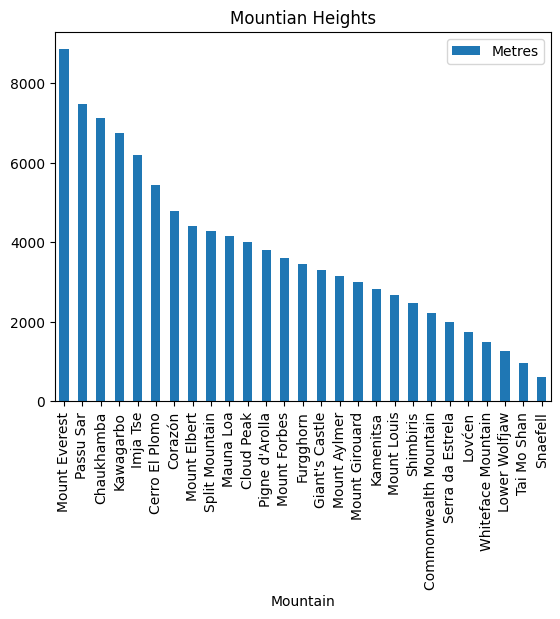

In [32]:
# Create a bar chart
# - using the mountain name for your `x`-axis data, and
# - using the height (either feet or meters, your choice!) for the `y`-axis data

plot = df[::61].plot.bar(x = "Mountain", y = "Metres")
plot.set_title("Mountian Heights")

### 🔬 Checkpoint Tests 🔬

In [33]:
### TEST CASE for Part 3: Higher than the Highest Mountain in the United States
tada = "\N{PARTY POPPER}"

assert("df_higherThanUS" in vars()), "You must create a variable called `df_higherThanUS`."
assert( len(list(set(df_higherThanUS["Mountain"]) & set(df_us["Mountain"]))) == 0 ), "Some of the mountains in `df_higherThanUS` are in the United States, but there should be none."
assert( len(df_higherThanUS) == len(df[ df.Feet > df_us.sort_values("Feet", ascending=False).iloc[0].Feet ]) ), "There are some mountains in `df_higherThanUS` that are shorter than the highest mountain in the United States, but there should be none."

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Publish you work to your GitHub

1.  ⚠️ **Make sure to save your work.** ⚠️ To do this, go to **File => Save All** or press **Crtl + S** on your keyboard. 
2.  After you have saved, exit this notebook and locate this file in your Module 1 folder. Move this file to your cloned GitHub repository folder which should be inside of the folder you created with your First and Last name. 
3. Open your terminal and change your directory to your cloned GitHub Repository and type in these commands:

4. git add -A
5. git commit -m "Any message here"
6. git push